<a href="https://colab.research.google.com/github/Vivek-afk81/data_mining/blob/main/k_MEANS_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/data_mining')
print(os.getcwd())

/content/drive/My Drive/data_mining


###CHALLENGE
For this challenge

1. Import and prepare the iris dataset.
2. Conduct a k-means cluster analysis.
3. Visualize the clusters.

###Import the libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

###Loading and understanding the Data

for this challenge we will be using the iris dataset

What is the Iris dataset?

It is a classic unsupervised learning dataset with:

* 150 flowers
* 4 numerical features
* 3 actual species (labels) — but we pretend we don’t know them

| Feature      | Meaning           |
| ------------ | ----------------- |
| Sepal Length | Outer leaf length |
| Sepal Width  | Outer leaf width  |
| Petal Length | Inner leaf length |
| Petal Width  | Inner leaf width  |


**Clustering goal**:
Can we group flowers only using measurements, without knowing species?

**NOTE**:- k-MEANS does not know biology,names,or truth. It only knows distance

In [7]:
from sklearn.datasets import load_iris

iris=load_iris()

iris_df=pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

iris_df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#checking if there is any NAN values
iris_df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


###Preparing Data for K-Means

K-Means is distance-based, so feature scaling is required.
Without scaling, features with larger numeric ranges dominate clustering, leading to biased clusters.

k-MEANS uses distance

specifically --> Euclidean distance

$d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + \cdots }$


Bigger numbers dominate distance

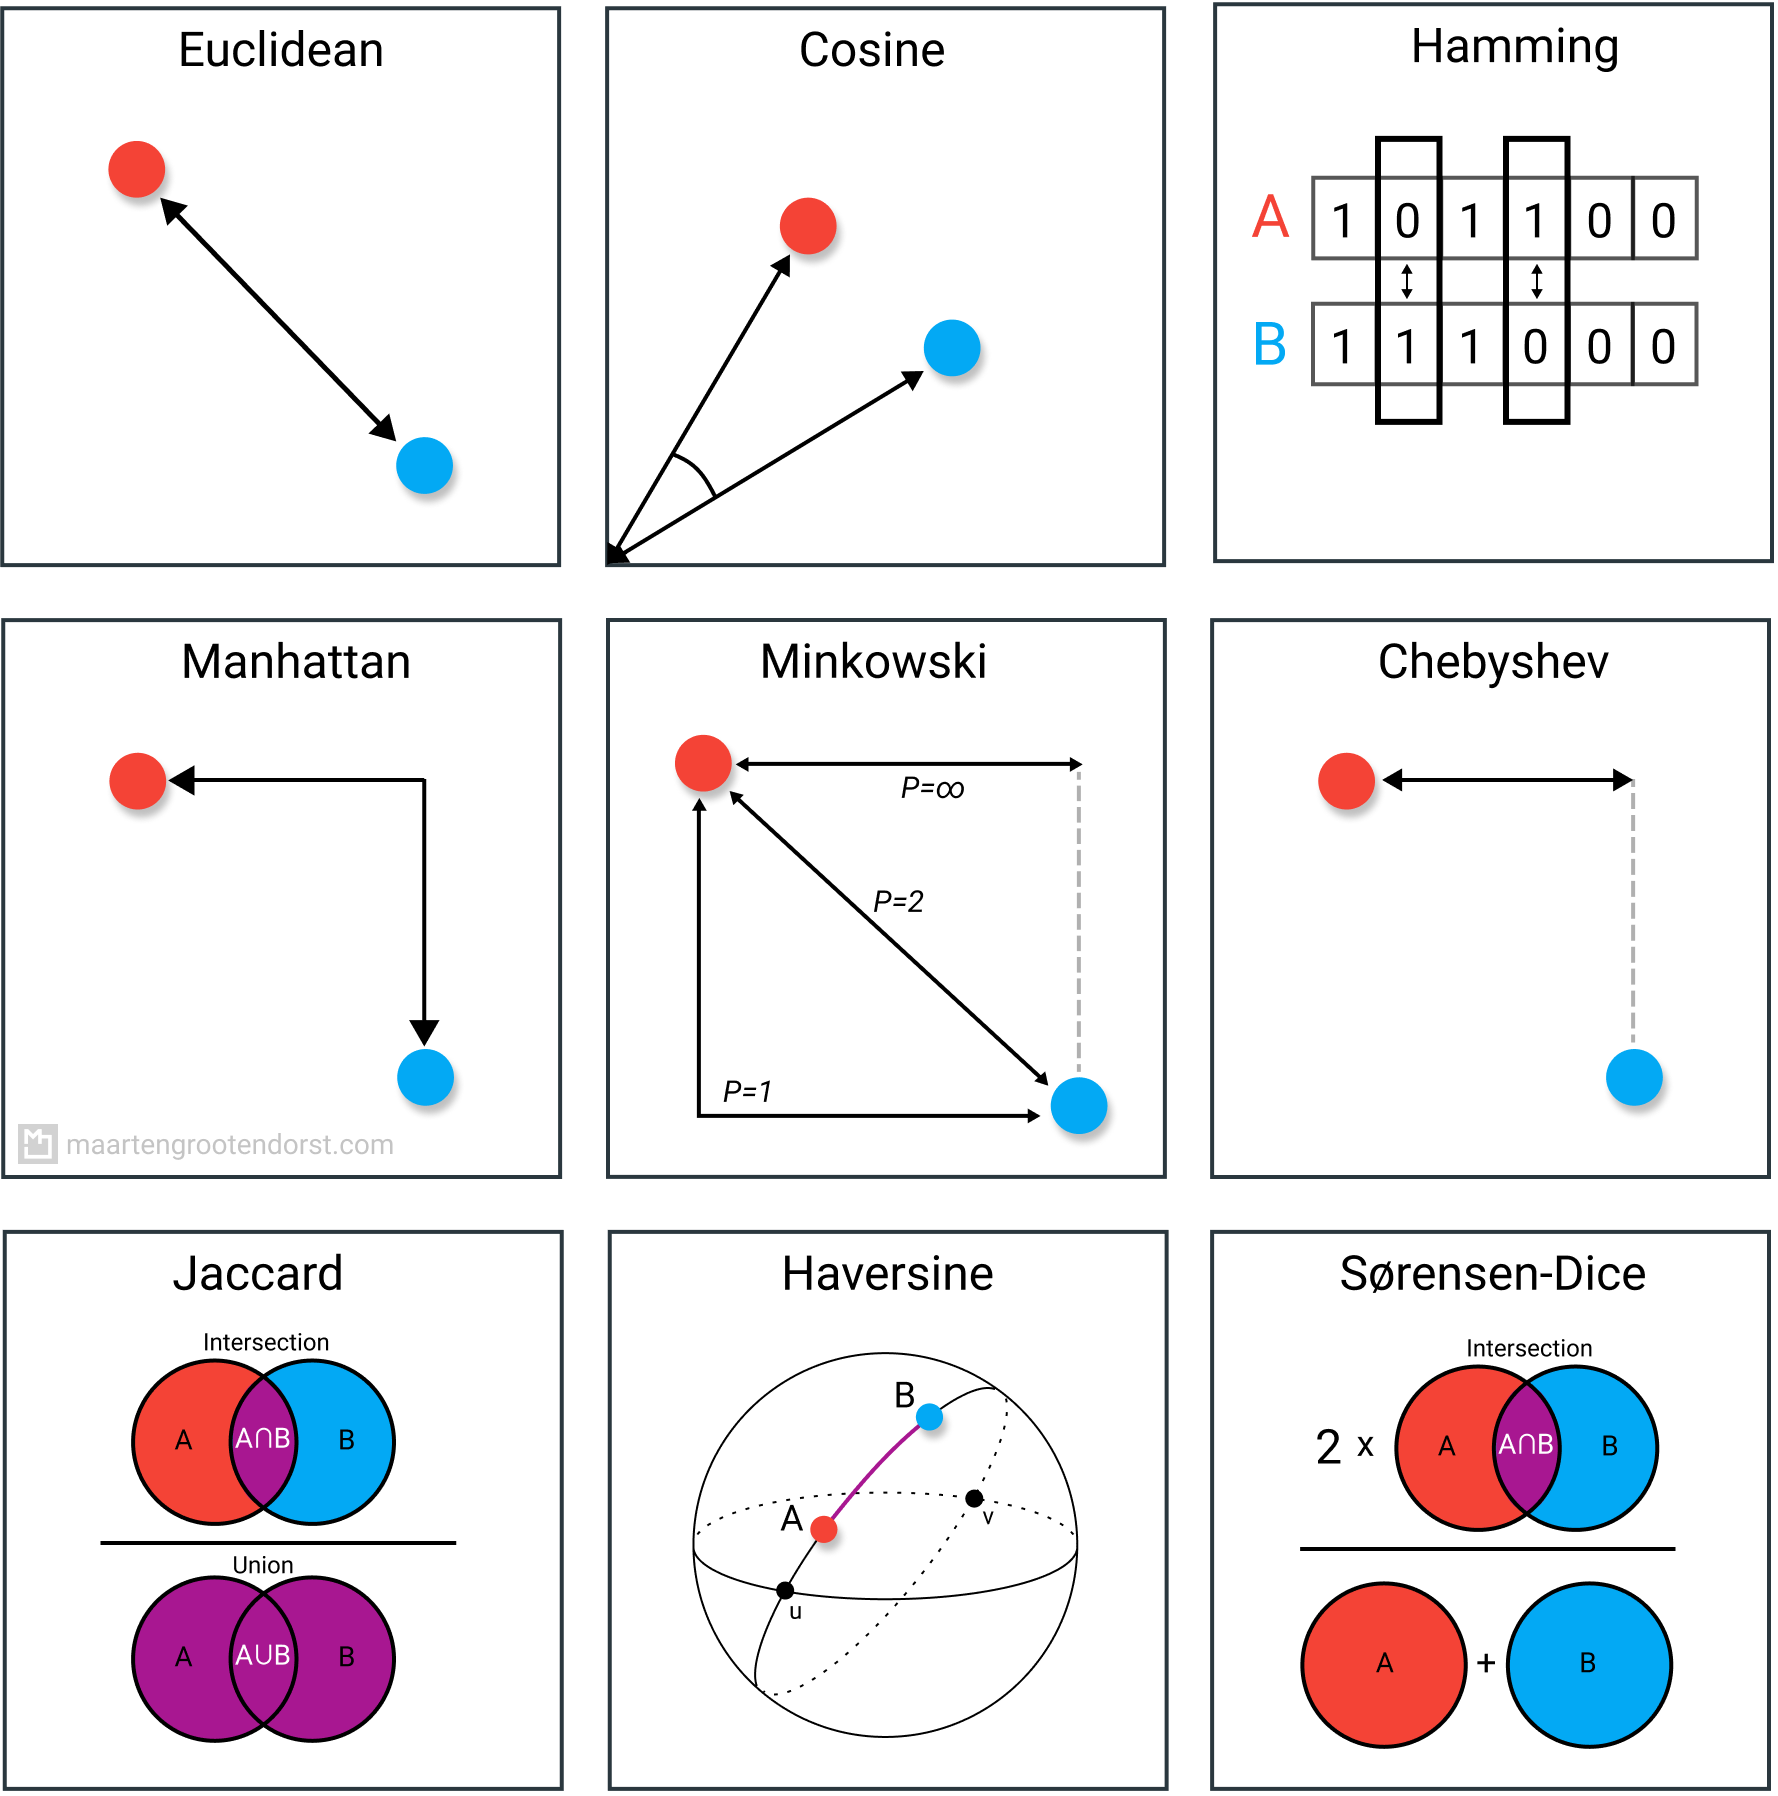

In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Need for the Feature scaling
* Sepal length: ~4 to 8
* Petal width: ~0.1 to 2.5

What does this mean?

Without scaling:

* Sepal length has more influence
* Petal width is almost ignored

In [16]:
scaler=StandardScaler()
iris_df_scaled=scaler.fit_transform(iris_df)
iris_df_scaled=pd.DataFrame(
    iris_df_scaled,
    columns=iris_df.columns
)
iris_df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [18]:
#checking the mean and standard deviation
print(iris_df_scaled.mean(axis=0))
print(iris_df_scaled.std(axis=0))

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


###Running k-MEANS Clustering

K-Means partitions data into K clusters by minimizing intra-cluster variance.
Each cluster is represented by a centroid, which is the mean of its assigned points

K = number of clusters you want

K-Means does NOT find the “correct” K
You must choose or justify it


K-Means is just repeating 3 simple steps:

1. Initialize centroids

    *  Randomly place K points (centroids)
    *  These are temporary guesses

2. Assign points
    *  Each data point goes to the nearest centroid

3. Update centroids
    * Move each centroid to the mean of its assigned points

Repeat until centroids stop moving

In [20]:
kmeans=KMeans(
    n_clusters=3,
    random_state=42
)

kmeans.fit(iris_df_scaled)

KMeans(n_clusters=3, random_state=42)

In [27]:
labels = kmeans.labels_
labels[:10]
kmeans.cluster_centers_


array([[ 0.57100359, -0.37176778,  0.69111943,  0.66315198],
       [-0.81623084,  1.31895771, -1.28683379, -1.2197118 ],
       [-1.32765367, -0.373138  , -1.13723572, -1.11486192]])

What K-Means assumes

| Assumption         | Meaning                  |
| ------------------ | ------------------------ |
| Spherical clusters | Round-ish shapes         |
| Similar size       | No giant + tiny clusters |
| Distance matters   | Needs scaling            |
| No outliers        | Sensitive to noise       |

Iris fits these assumptions well — that’s why it’s famous.

###Visualization

our data has 4 features-> 4 dimensions

humans can visualize 2 or 3 dimension
so we need  a projection ,not the plot of raw data

Now we will use Principal Component Analysis

PCA= PCA finds new axes that capture the maximum variation in data.

In [21]:
from sklearn.decomposition import PCA

pca=PCA(
    n_components=2,
    random_state=42
)
iris_pca=pca.fit_transform(iris_df_scaled)

In [23]:
iris_pca.shape,iris_pca

((150, 2),
 array([[-2.26470281,  0.4800266 ],
        [-2.08096115, -0.67413356],
        [-2.36422905, -0.34190802],
        [-2.29938422, -0.59739451],
        [-2.38984217,  0.64683538],
        [-2.07563095,  1.48917752],
        [-2.44402884,  0.0476442 ],
        [-2.23284716,  0.22314807],
        [-2.33464048, -1.11532768],
        [-2.18432817, -0.46901356],
        [-2.1663101 ,  1.04369065],
        [-2.32613087,  0.13307834],
        [-2.2184509 , -0.72867617],
        [-2.6331007 , -0.96150673],
        [-2.1987406 ,  1.86005711],
        [-2.26221453,  2.68628449],
        [-2.2075877 ,  1.48360936],
        [-2.19034951,  0.48883832],
        [-1.898572  ,  1.40501879],
        [-2.34336905,  1.12784938],
        [-1.914323  ,  0.40885571],
        [-2.20701284,  0.92412143],
        [-2.7743447 ,  0.45834367],
        [-1.81866953,  0.08555853],
        [-2.22716331,  0.13725446],
        [-1.95184633, -0.62561859],
        [-2.05115137,  0.24216355],
        [-2.16857

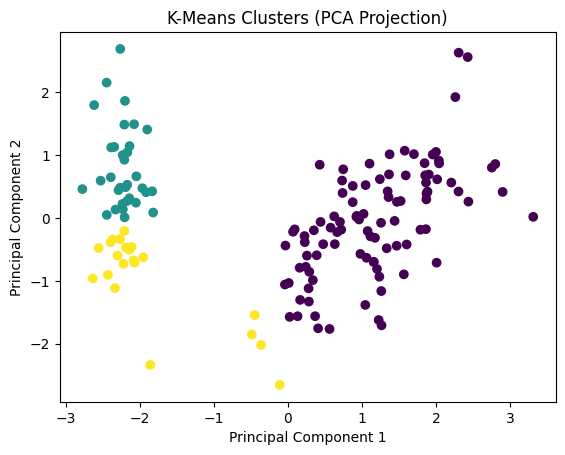

In [28]:
plt.scatter(
    iris_pca[:,0],
    iris_pca[:,1],
    c=labels,
    cmap='viridis' #viridis colormap (dark purple → yellow gradient).
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters (PCA Projection)")
plt.show()

One cluster is clearly separable, while two show partial overlap, suggesting similar feature distributions

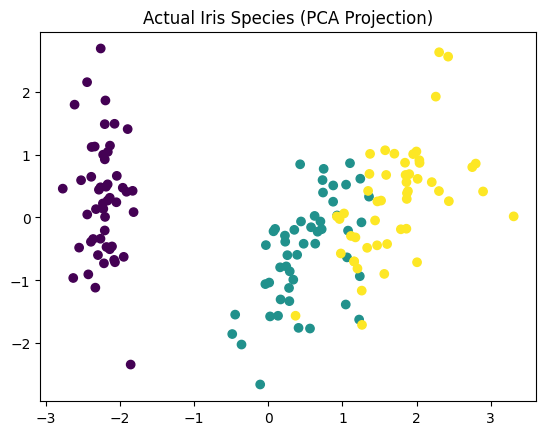

In [30]:
#comparing with true labels
plt.scatter(
    iris_pca[:, 0],
    iris_pca[:, 1],
    c=iris.target,
    cmap='viridis'
)

plt.title("Actual Iris Species (PCA Projection)")
plt.show()


###Evaluating Clusters with Silhouette Score

The Silhouette Score measures how well points fit within their assigned cluster compared to other clusters.
A score around 0.55 indicates reasonably well-separated clusters with some overlap

For each data point, Silhouette checks:
1. How close am I to points in my own cluster?

2. How far am I from points in the nearest other cluster?

Then it gives a score between -1 and +1.

interpretation
| Silhouette value | Meaning                |
| ---------------- | ---------------------- |
| **~ +1**         | Very well clustered    |
| **~ 0**          | On the boundary        |
| **< 0**          | Probably misclassified |


In [31]:
score = silhouette_score(iris_df_scaled, labels)
score

np.float64(0.4798814508199817)

In [34]:
scores = {}

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_k = kmeans.fit_predict(iris_df_scaled)
    scores[k] = silhouette_score(iris_df_scaled, labels_k)

scores


{2: np.float64(0.5817500491982808),
 3: np.float64(0.4798814508199817),
 4: np.float64(0.3850454053045392),
 5: np.float64(0.34503345350274617),
 6: np.float64(0.3339432304006177),
 7: np.float64(0.2664290993719981)}

####Doing the whole training again without PCA to see the difference

In [37]:
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [39]:
km=KMeans(
    n_clusters=3,
    random_state=42,
    init='k-means++',
    n_init=10
)

km.fit(iris_df_scaled)
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

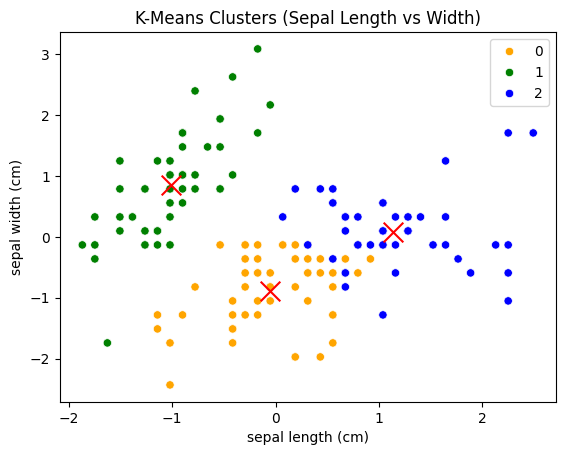

In [40]:
# scatter plot of original features
sns.scatterplot(
    x=iris_df_scaled['sepal length (cm)'],
    y=iris_df_scaled['sepal width (cm)'],
    hue=km.labels_,
    palette=["orange", "green", "blue"]
)

# plot cluster centers (converted back)
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    marker='x',
    s=200,
    c='red'
)

plt.title("K-Means Clusters (Sepal Length vs Width)")
plt.show()
